In [23]:
%matplotlib inline
import ttim
import numpy as np
import matplotlib.pyplot as plt


ml = ttim.Model3D(kaq=[1.0, 1.0], z=[50., 0., -50.], Saq=[0.1, 0.1], kzoverkh=[0.1, 0.1], 
                  phreatictop=True, tmin=0.1, tmax=20., M=20)
#ml = ttim.ModelMaq(kaq=[1.0], z=[50., 0.], c=[], Saq=[0.1], topboundary='imp', 
#                   phreatictop=True, tmin=0.1, tmax=20., M=20)
ttim.CircAreaSink(ml, xc=0., yc=0., R=20., tsandbc=[[0.1, 0.25], [10., 0.00]])
solved = ml.solve()

ValueError: operands could not be broadcast together with shapes (2,3,41) (1,2,123) 

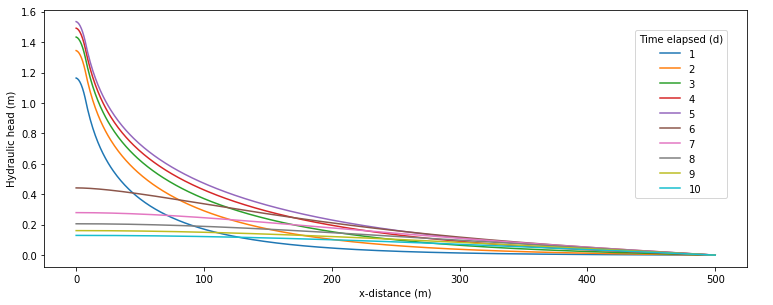

In [38]:
f,s = plt.subplots(figsize=[32.00/2.54, 12.00/2.54])
for t in np.arange(2., 22., 2.):
    s.plot(ml.headalongline(x=np.arange(-100., 101.), y=np.zeros(201), t=t, layers=0), label=str(i+1))
s.set_xlabel('x-distance (m)')
s.set_ylabel('Hydraulic head (m)')
#s.set_ylim(-1, 51)
f.legend(title='Time elapsed (d)', loc=[0.82, 0.35])

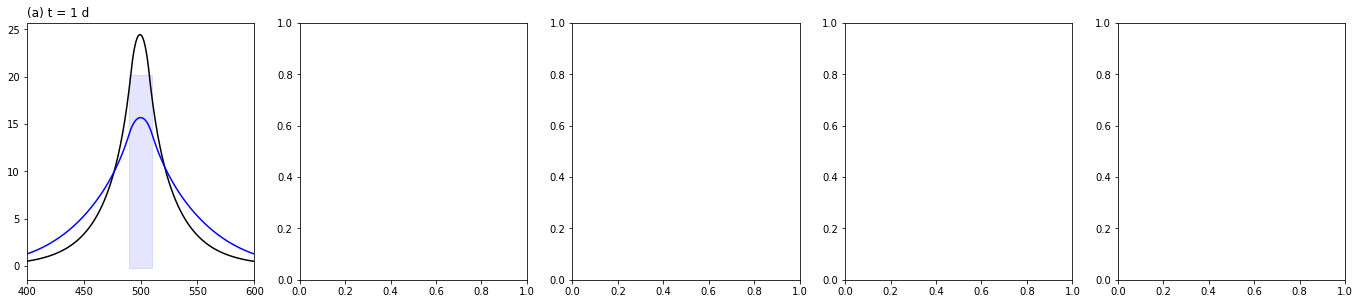

In [160]:
# Compare TTim output to Hantush solution:

from scipy.special import erf
from scipy.integrate import quad


def integrand(tau, alpha, beta):
    return erf(alpha/np.sqrt(tau))*erf(beta/np.sqrt(tau))


def Sstar(alpha, beta):
    return float(quad(integrand, 0., 1., args=(alpha, beta))[0])
    

def Z(x, t):
    global R, D, K, l, a, y
    return R*D*t/2./K*(Sstar((l+x)/np.sqrt(4.*D*t), (a+y)/np.sqrt(4.*D*t))+
                       Sstar((l+x)/np.sqrt(4.*D*t), (a-y)/np.sqrt(4.*D*t))+
                       Sstar((l-x)/np.sqrt(4.*D*t), (a+y)/np.sqrt(4.*D*t))+
                       Sstar((l-x)/np.sqrt(4.*D*t), (a-y)/np.sqrt(4.*D*t)))


def Hantush(x, t):
    global h0
    return np.sqrt(h0**2.+Z(x, t))#-Z(x, t-nper/2))

    
h0  = 0.   
b   = 10.
R   = 1.
K   = 1.
Sy  = 0.01
D   = K*b/Sy
l,a = 10., 10.
y   = 0.
X = np.arange(-500., 501., 1.)


hds = bf.HeadFile('model/model.hds').get_alldata()*4.

f,s = plt.subplots(1, 5, figsize=[60.00/2.54, 12.00/2.54])

abc = 'abcde'
for i in range(1):
    s[i].set_title('('+abc[i]+') t = '+str(i+1)+' d', loc='left')
    s[i].plot(hds[i, 0, (nrow-1)/2, :], 'k-', label='Modflow')
    s[i].plot(X+500., [Hantush(x, float(i+1.)) for x in X], 'b-', label='Hantush')
    s[i].fill([500.-l, 500.-l, 500.+l, 500.+l], [-0.2, 20.2, 20.2, -0.2], c='b', alpha=0.1, zorder=-1)
    s[i].set_xlim(400, 600)
    #s[i].set_ylim(-0.2, 20.2)
#f.legend()
